Скачайте материалы к занятию. Проанализируйте ряды, сделайте их стационарными.

Решением будет ссылка на гитхаб с ноутбуком.

In [108]:
import pandas as pd

In [109]:
daily_total_female_births_in_cal = pd.read_csv("daily-total-female-births-in-cal.csv")
international_airline_passengers = pd.read_csv("international-airline-passengers.csv")
mean_monthly_air_temperature_deg = pd.read_csv("mean-monthly-air-temperature-deg.csv")
monthly_boston_armed_robberies_j = pd.read_csv("monthly-boston-armed-robberies-j.csv")
monthly_sales_of_company_x_jan_6 = pd.read_csv("monthly-sales-of-company-x-jan-6.csv")
weekly_closings_of_the_dowjones = pd.read_csv("weekly-closings-of-the-dowjones-.csv")

In [110]:
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
all_series = {
    "Daily total female births in cal": daily_total_female_births_in_cal["Count"],
    "International airline passengers": international_airline_passengers["Count"],
    "Mean monthly air temperature deg": mean_monthly_air_temperature_deg["Deg"],
    "Monthly boston armed robberies j": monthly_boston_armed_robberies_j["Count"],
    "Monthly sales of company x jan 6": monthly_sales_of_company_x_jan_6["Count"],
    "Weekly closings of the dowjones": weekly_closings_of_the_dowjones["Close"]
}

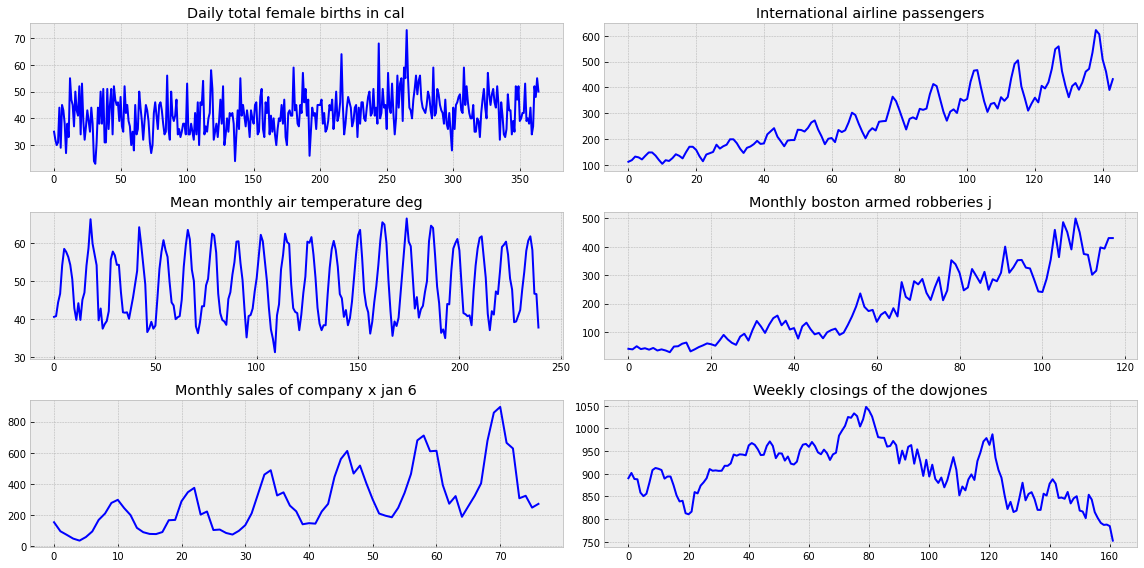

In [112]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

Daily total female births in cal - исходя из графика это стационарный временнной ряд;
International airline passengers - просматривается тренд на увеличение, сезонность;
Mean monthly air temperature deg - сезонный временной ряд;
Monthly boston armed robberies j - просматривается тренд на увеличение;
Monthly sales of company x jan 6 - просматривается тренд на увеличение, сезонность;
Weekly closings of the dowjones - трудно сказать, возможно тренд на понижение.

In [113]:
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
from scipy.stats import boxcox

# Daily total female births in cal

Тест Дики-Фуллера

In [114]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [115]:
test_stationarity(all_series["Daily total female births in cal"])

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


Коррелограммы

In [144]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

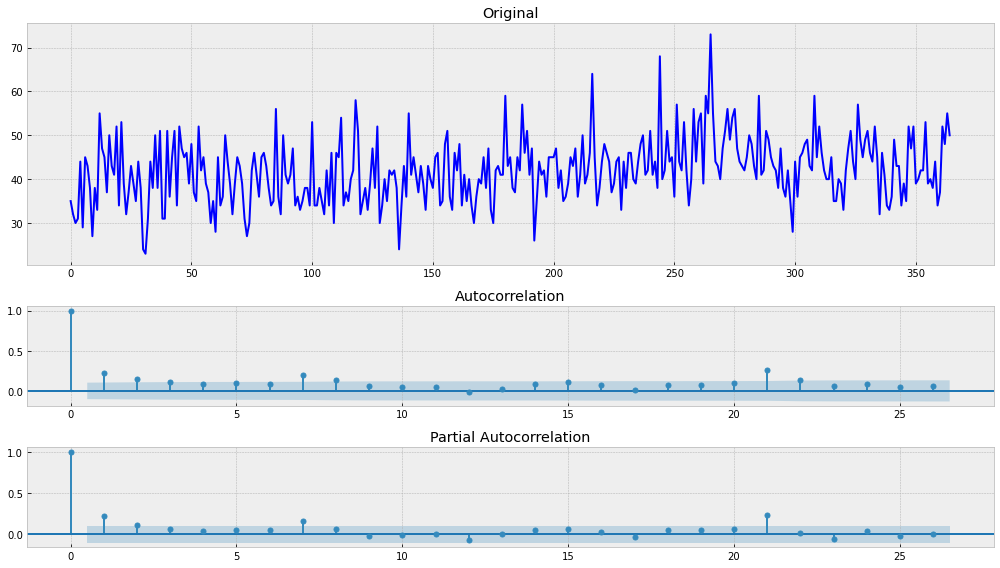

In [145]:
tsplot(all_series["Daily total female births in cal"])

Тест Дики-Фуллера и графики коррелограмм отвергают гиппотезу о нестационарности временного ряда 

# International airline passengers

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


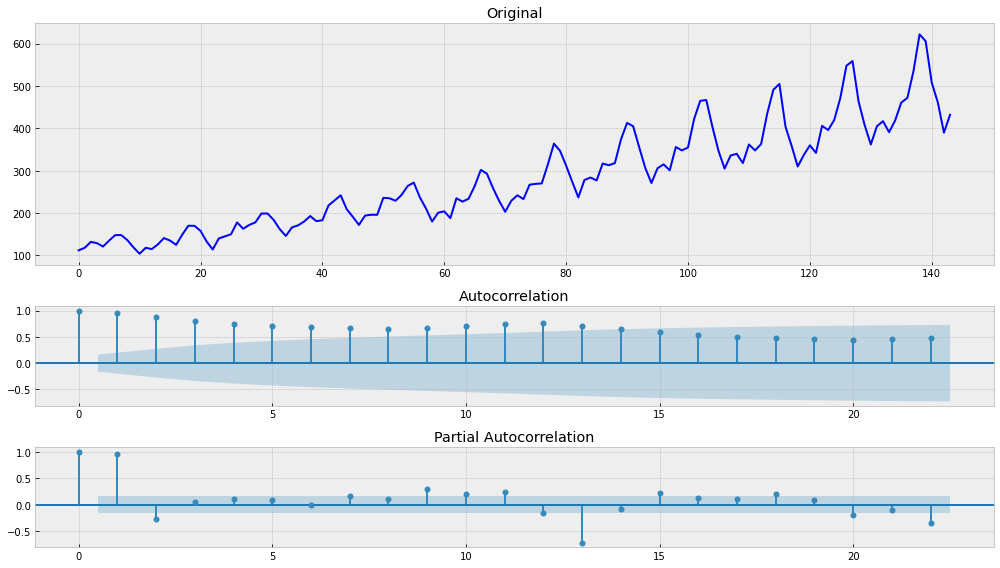

In [146]:
test_stationarity(all_series["International airline passengers"])
tsplot(all_series["International airline passengers"])

Тест Дики-Фуллера и графики коррелограмм не отвергают гиппотезу о нестационнарности ряда 

нормализуем дисперсию

In [147]:
series = boxcox(all_series["International airline passengers"], 0)

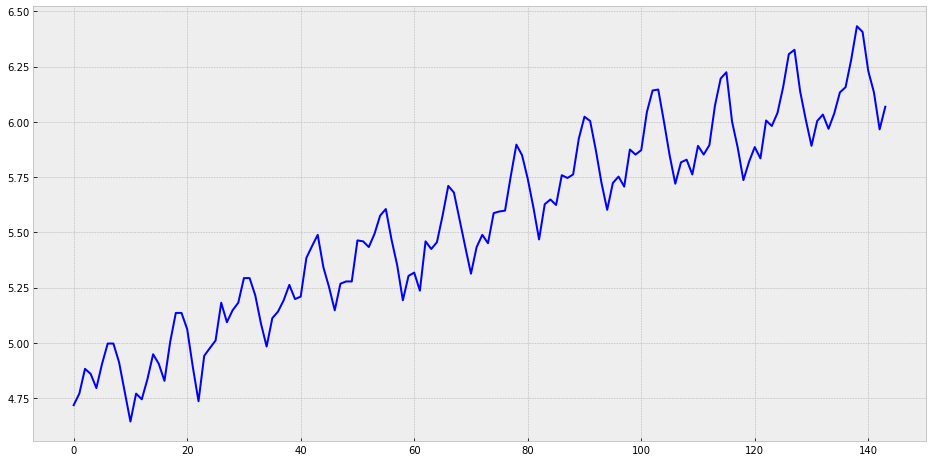

In [148]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, color='blue')

дифференцируем

In [149]:
series = np.diff(series, 1)

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


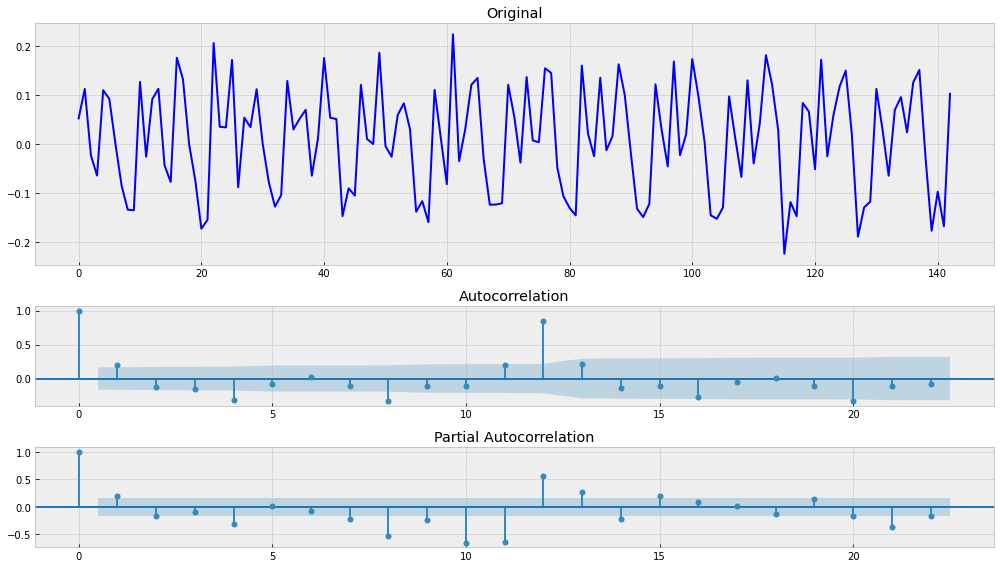

In [150]:
test_stationarity(series)
tsplot(series)

Убираем влияние сезонности

In [151]:
series = series[12:] - series[:-12]

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


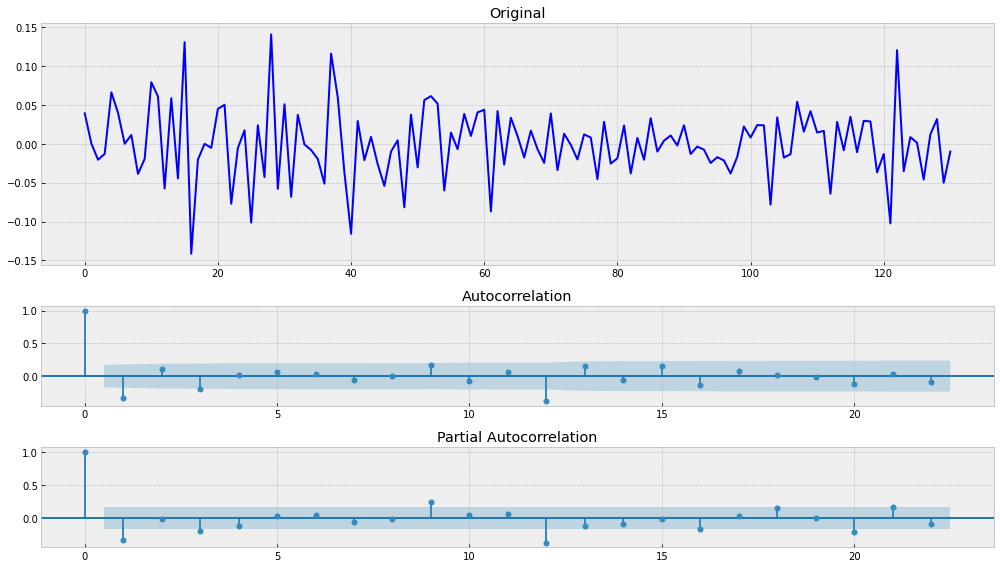

In [152]:
test_stationarity(series)
tsplot(series)

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!

# Mean monthly air temperature deg

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


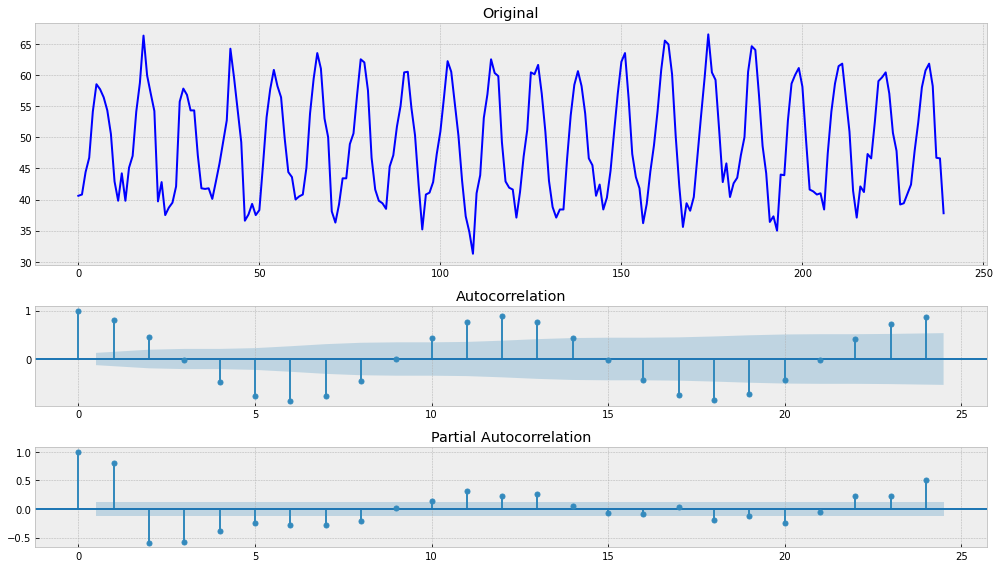

In [153]:
test_stationarity(all_series["Mean monthly air temperature deg"])
tsplot(all_series["Mean monthly air temperature deg"])

Чётко прослеживается сезонность

ищем сезонность

In [154]:
def plot_ts_and_points(ts, start_point, step):
    new_series = [None for i in range(len(ts))]
    for i in range(len(ts)):
        pos = start_point + step * i
        if pos >= len(ts):
            break
        new_series[pos] = ts[pos]
    new_series = pd.Series(new_series)
    
    with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        ts_ax = plt.axes()
        ts.plot(ax=ts_ax, color='blue')
        new_series.plot(ax=ts_ax, style='ro')

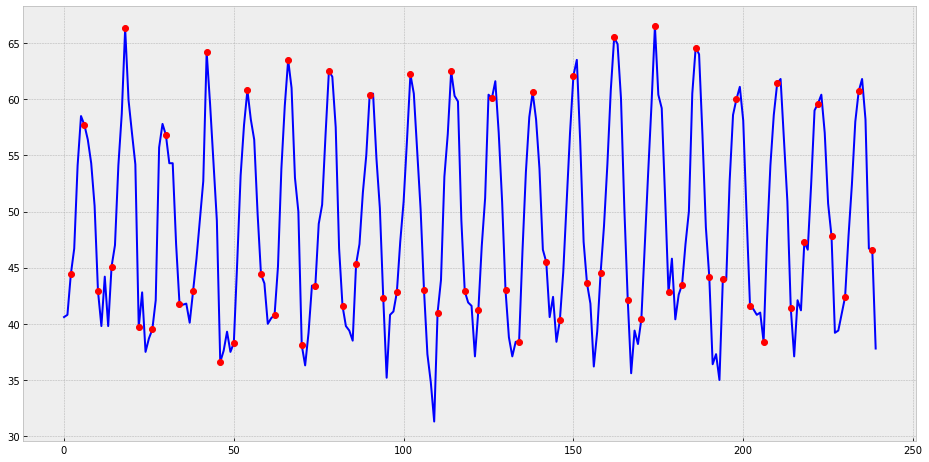

In [155]:
plot_ts_and_points(mean_monthly_air_temperature_deg['Deg'], 2, 4)

нормализуем

In [156]:
air_temperature = boxcox(all_series["Mean monthly air temperature deg"], 0)

избавляемся от зависимости сезонности

In [157]:
air_temperature = air_temperature[12:] - air_temperature[:-12]

Results of Dickey-Fuller Test:
Test Statistic                -6.411725e+00
p-value                        1.883599e-08
#Lags Used                     1.200000e+01
Number of Observations Used    2.150000e+02
Critical Value (1%)           -3.461136e+00
Critical Value (5%)           -2.875079e+00
Critical Value (10%)          -2.573986e+00
dtype: float64


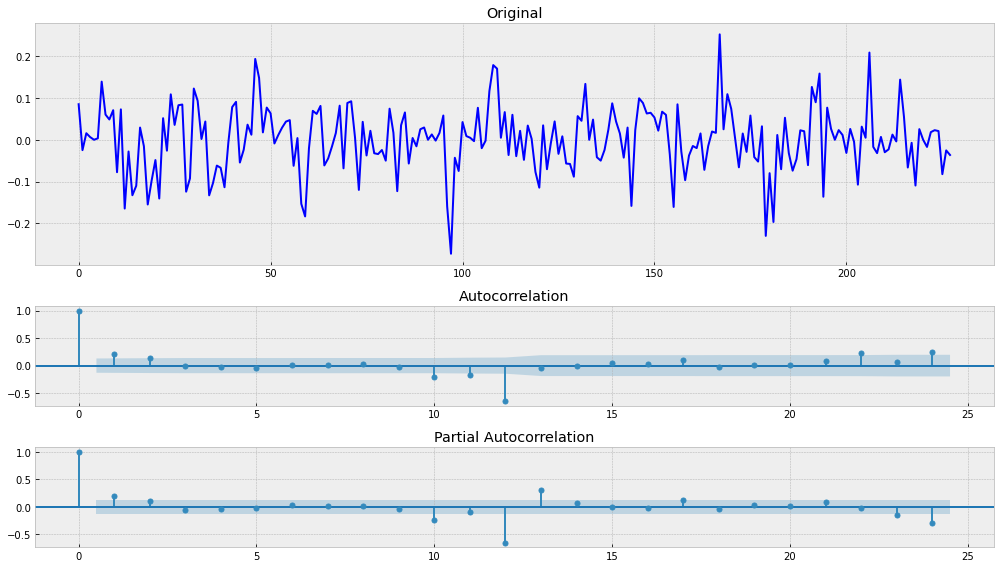

In [158]:
test_stationarity(air_temperature)
tsplot(air_temperature)

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!

# Monthly boston armed robberies j

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


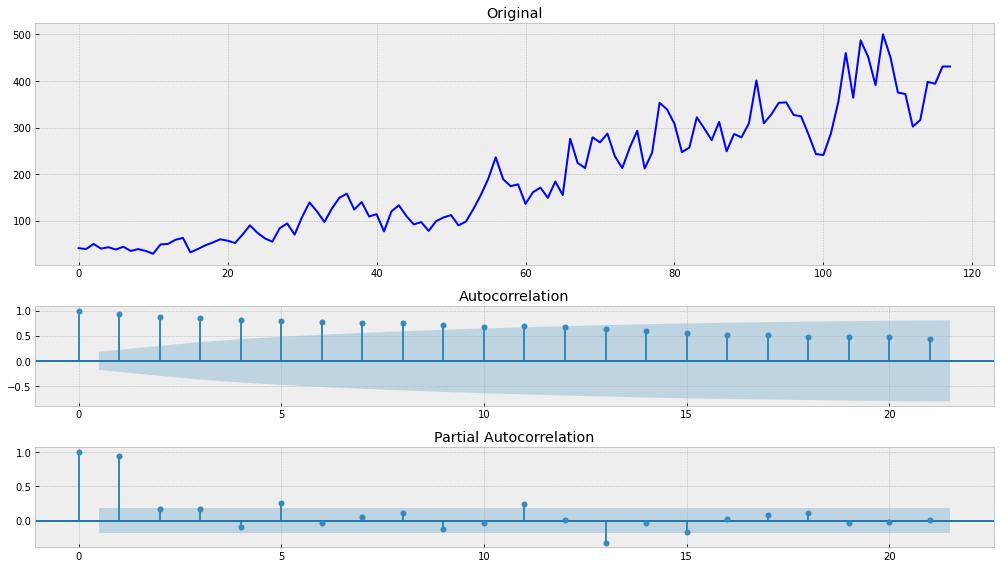

In [159]:
test_stationarity(all_series["Monthly boston armed robberies j"])
tsplot(all_series["Monthly boston armed robberies j"])

явный тренд на увеличение

нормализуем

In [160]:
boston_armed_robberies = boxcox(all_series["Monthly boston armed robberies j"], 0)

дифференцируем

In [161]:
boston_armed_robberies = np.diff(boston_armed_robberies, 1)

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


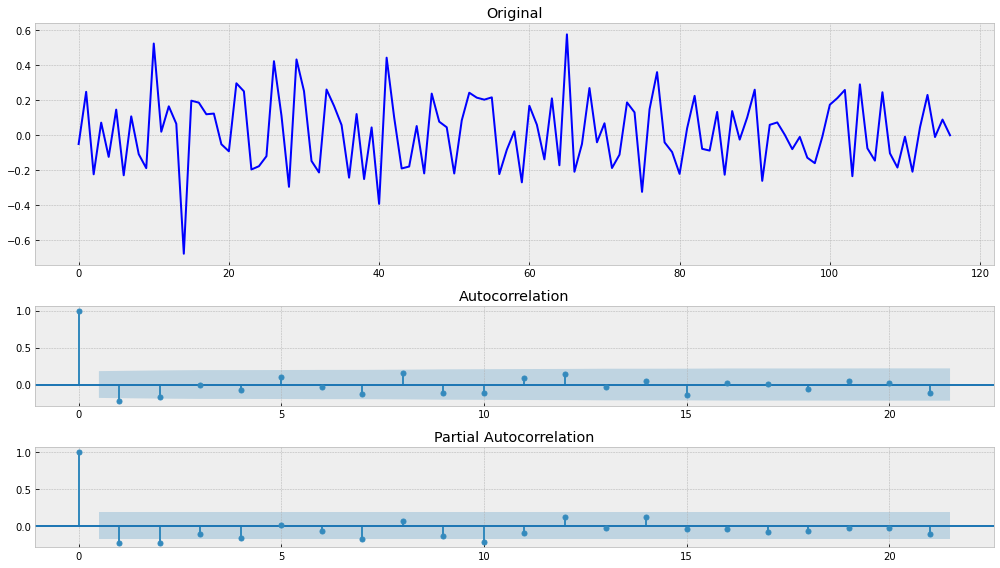

In [162]:
test_stationarity(boston_armed_robberies)
tsplot(boston_armed_robberies)

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!

# Monthly sales of company x jan 6

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


C:\Users\CoreI7\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1434: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


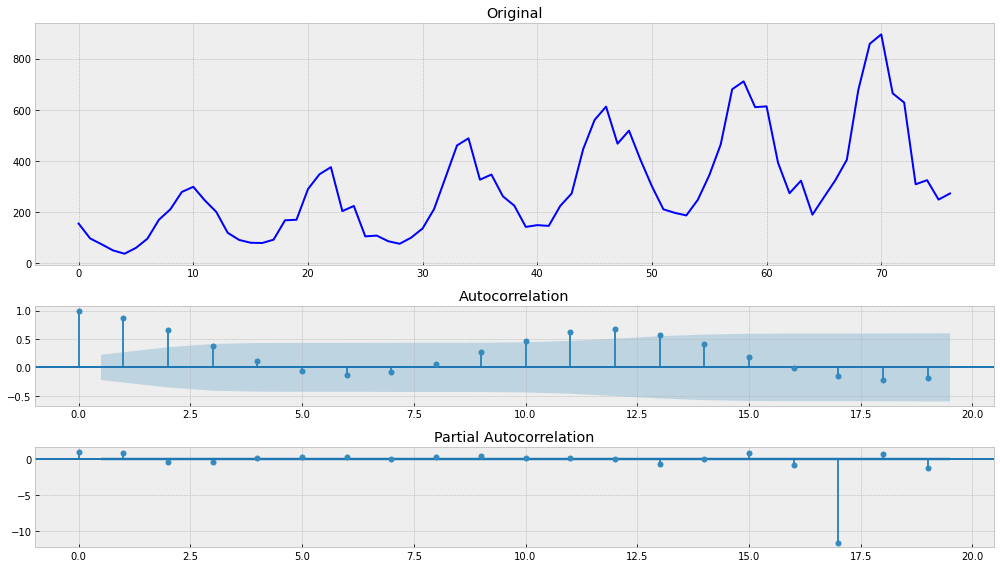

In [163]:
test_stationarity(all_series["Monthly sales of company x jan 6"])
tsplot(all_series["Monthly sales of company x jan 6"])

Просматривается тренд на увеличение и сезонность

тест на сезонность

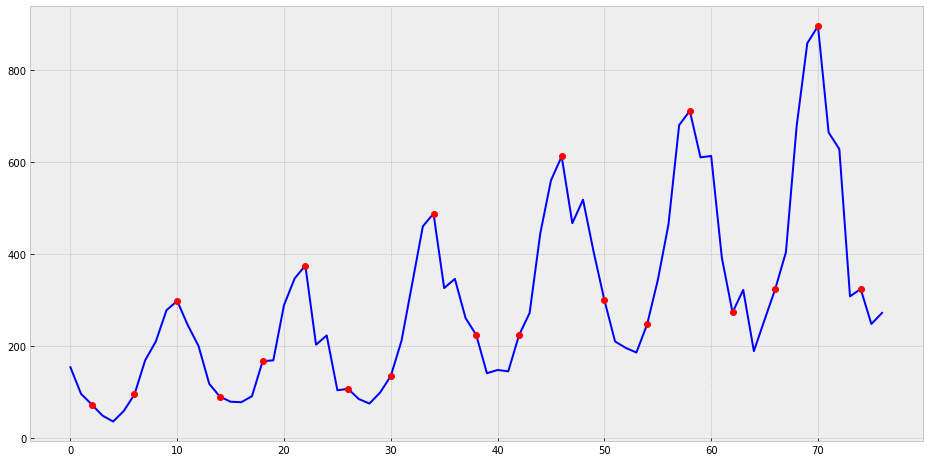

In [164]:
plot_ts_and_points(monthly_sales_of_company_x_jan_6['Count'], 2, 4)

явно видно зависимость от сезонности

нормализуем

In [165]:
sales_of_company = boxcox(all_series["Monthly sales of company x jan 6"], 0)

дифференцуируем

In [166]:
sales_of_company = np.diff(sales_of_company, 2)

убираем зависимость от сезонности

In [167]:
sales_of_company = sales_of_company[12:] - sales_of_company[:-12]

Results of Dickey-Fuller Test:
Test Statistic                 -5.290390
p-value                         0.000006
#Lags Used                      9.000000
Number of Observations Used    53.000000
Critical Value (1%)            -3.560242
Critical Value (5%)            -2.917850
Critical Value (10%)           -2.596796
dtype: float64


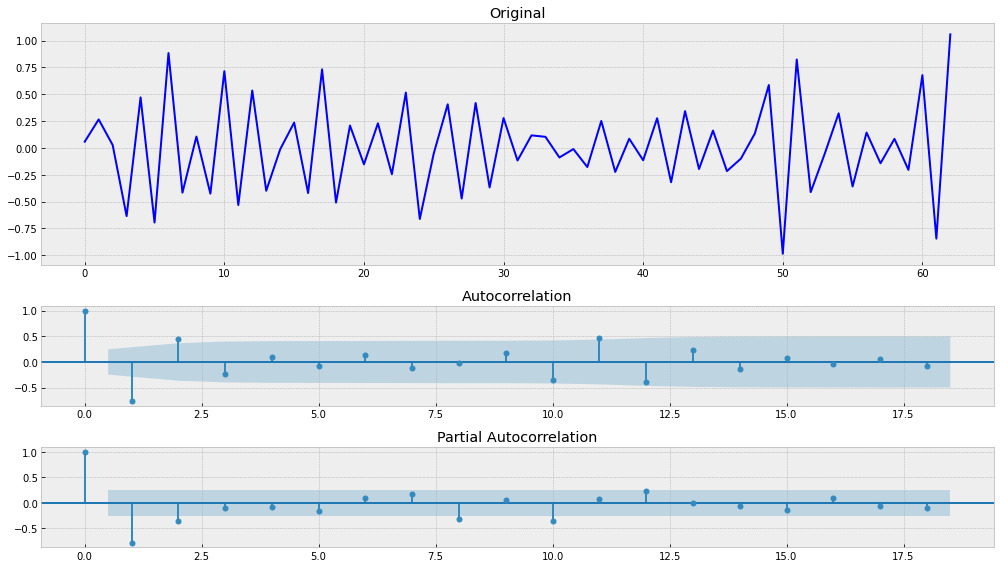

In [168]:
test_stationarity(sales_of_company)
tsplot(sales_of_company)

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!

Weekly closings of the dowjones

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


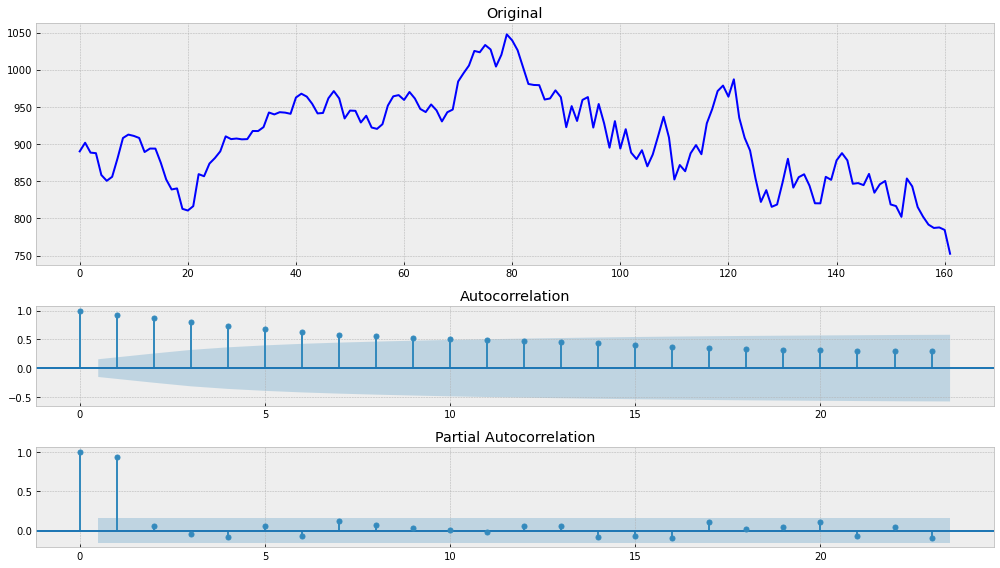

In [169]:
test_stationarity(all_series["Weekly closings of the dowjones"])
tsplot(all_series["Weekly closings of the dowjones"])

посмотрим сезонность

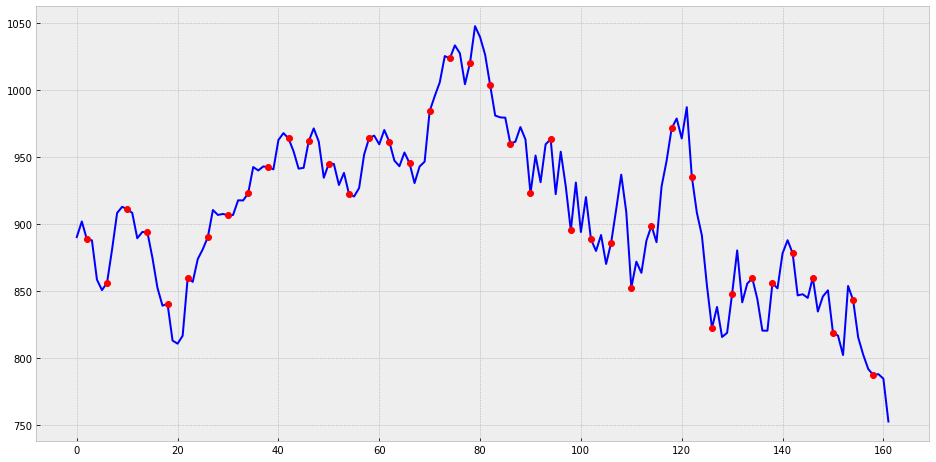

In [170]:
plot_ts_and_points(weekly_closings_of_the_dowjones["Close"], 2, 4)

нормализуем и продифференциируем

In [171]:
closings_of_the_dowjones = boxcox(all_series["Weekly closings of the dowjones"], 0)

In [172]:
closings_of_the_dowjones = np.diff(closings_of_the_dowjones, 1)

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


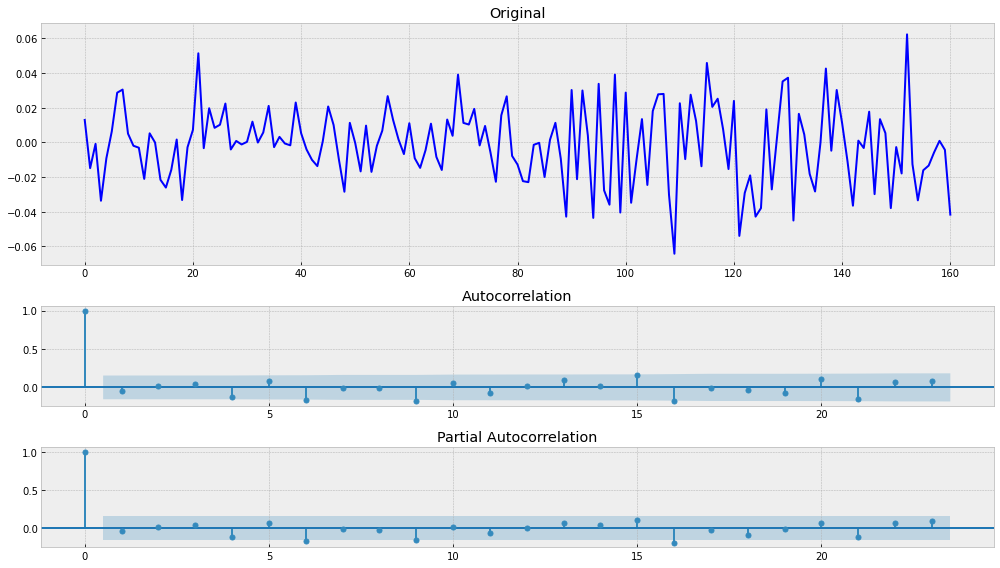

In [173]:
test_stationarity(closings_of_the_dowjones)
tsplot(closings_of_the_dowjones)

Теперь тест Дики-Фуллера и графики коррелограмм отвергают гипотезу о нестационарности ряда!